In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
train1=pd.read_excel("/home/udit/Music/fliprhackathonhiringprogram4_0machinelearningtask/Train_dataset.xlsx",'Diuresis_TS')
train2=pd.read_excel("/home/udit/Music/fliprhackathonhiringprogram4_0machinelearningtask/Train_dataset.xlsx")

In [59]:
train1.head()

,people_ID,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
0,1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
1,2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
2,3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
3,4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
4,5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


In [60]:
train2.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [61]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [28]:
train2=train2.drop(['Diuresis'],axis=1)

In [29]:
train2

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,22691,Bengaluru,Male,Mr,ashish,NO,2.0,Business,Car,8,...,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760
10710,22692,Bengaluru,Male,Mr,mohd mujahid ansari,YES,0.0,Manufacturing,Car,8,...,134.0,211.0,65.0,47.0,35,7,1500000.0,700000,NaN,47.148663
10711,22693,Bengaluru,Male,Mr,munnakumar,YES,0.0,Clerk,Public,8,...,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533
10712,22694,Bengaluru,Male,Mr,prakash,YES,1.0,Legal,Walk,8,...,110.0,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,53.803565


In [38]:
df_row = pd.merge(train1, train2,on='people_ID')


In [41]:
df_row=df_row.drop(['Infect_Prob'],axis=1)

In [42]:
df_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10714 entries, 0 to 10713
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   people_ID               10714 non-null  int64  
 1   2020-03-20 00:00:00     10714 non-null  int64  
 2   2020-03-21 00:00:00     10714 non-null  float64
 3   2020-03-22 00:00:00     10714 non-null  float64
 4   2020-03-23 00:00:00     10714 non-null  float64
 5   2020-03-24 00:00:00     10714 non-null  float64
 6   2020-03-25 00:00:00     10714 non-null  float64
 7   2020-03-26 00:00:00     10714 non-null  float64
 8   Region                  10714 non-null  object 
 9   Gender                  10714 non-null  object 
 10  Designation             10714 non-null  object 
 11  Name                    10694 non-null  object 
 12  Married                 10714 non-null  object 
 13  Children                10403 non-null  float64
 14  Occupation              9967 non-null 

In [65]:
train1.head()
train3=train1
train1=train1.drop(['people_ID'],axis=1)

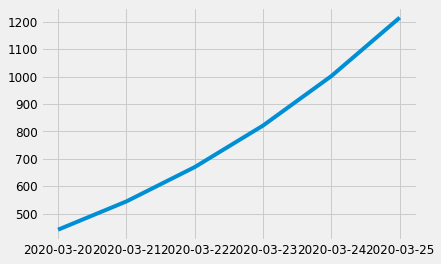

In [15]:
plt.plot(train1.iloc[0,:-1])

In [19]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [66]:
result = train1.transpose() 


In [67]:
result.head()

,0,1,2,3,4,5,6,7,8,9,...,10704,10705,10706,10707,10708,10709,10710,10711,10712,10713
2020-03-20 00:00:00,441.0000,151.0000,416.0000,410.000,390.00,389.0000,322.0000,194.0000,310.000,242.0000,...,339.0000,241.0000,183.0000,297.0000,397.0000,134.0000,387.0000,177.0000,352.0000,181.0000
2020-03-21 00:00:00,544.2000,197.2000,515.2000,506.000,483.00,480.8000,401.4000,246.8000,385.000,303.4000,...,420.8000,305.2000,232.6000,370.4000,489.4000,173.8000,479.4000,228.4000,438.4000,230.2000
2020-03-22 00:00:00,669.6400,253.2400,632.4400,621.400,595.00,591.1600,497.0800,310.3600,477.400,379.4800,...,519.1600,382.8400,293.3200,459.8800,603.8800,225.1600,591.8800,288.2800,542.6800,290.4400
2020-03-23 00:00:00,821.3680,321.6880,776.7280,761.880,730.20,723.9920,611.0960,388.6320,589.080,469.9760,...,639.1920,477.2080,368.1840,568.0560,742.4560,287.9920,724.8560,362.1360,665.8160,366.3280
2020-03-24 00:00:00,1002.2416,399.9256,947.7736,928.156,892.84,882.6904,749.0152,482.9584,720.796,578.7712,...,780.9304,588.3496,458.4208,698.2672,906.6472,359.4904,884.6272,448.4632,814.6792,455.2936


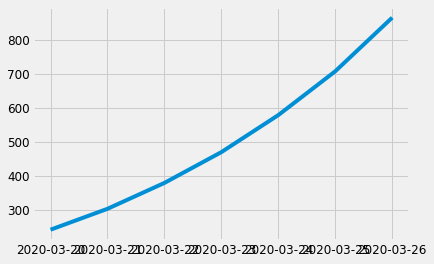

In [68]:
plt.plot(result[9])

In [69]:
result.iloc[:,0:2]

,0,1
2020-03-20 00:00:00,441.000000,151.000000
2020-03-21 00:00:00,544.200000,197.200000
2020-03-22 00:00:00,669.640000,253.240000
2020-03-23 00:00:00,821.368000,321.688000
2020-03-24 00:00:00,1002.241600,399.925600
2020-03-25 00:00:00,1215.689920,492.910720
2020-03-26 00:00:00,1472.627904,606.892864


In [70]:
train_size = int(10714 * 0.80)
test_size = 10714 - train_size
train, test = result.iloc[:,0:train_size], result.iloc[:,train_size:10714]

In [71]:
train=train.transpose()

In [72]:
test=test.transpose()

In [73]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

clf.fit(X_train,y_train)
# Test
accuracy = clf.score(X_test, y_test)
print("Accuracy of Linear Regression: ", accuracy)

Accuracy of Linear Regression:  0.9999912203819948


In [74]:
forecast_prediction = clf.predict(train1.iloc[:,1:])
print(forecast_prediction)

[1781.79151623  742.13575635 1688.78563729 ...  825.97311571 1458.78988335
  837.79961261]


In [75]:
train1["2020-03-27 00:00:00"] = clf.predict(train1.iloc[:,1:])

In [78]:
train1.head()

,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,people_ID
0,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904,1781.791516,1
1,151,197.2,253.24,321.688,399.9256,492.91072,606.892864,742.135756,2
2,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984,1688.785637,3
3,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640,1655.430616,4
4,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600,1593.292338,5


In [57]:
train2=train2.drop(['Diuresis'],axis=1)

In [77]:
train1["people_ID"] = train3["people_ID"]

In [79]:
df_row = pd.merge(train1, train2,on='people_ID')

In [83]:
df_row.head()

,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,people_ID,Region,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904,1781.791516,1,Bhubaneshwar,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,151,197.2,253.24,321.688,399.9256,492.91072,606.892864,742.135756,2,Bhubaneshwar,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984,1688.785637,3,Bhubaneshwar,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640,1655.430616,4,Bhubaneshwar,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600,1593.292338,5,Bhubaneshwar,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [91]:
train2['Diuresis']=train1["2020-03-27 00:00:00"]

In [92]:
train2

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,22691,Bengaluru,Male,Mr,ashish,NO,2.0,Business,Car,8,...,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760
10710,22692,Bengaluru,Male,Mr,mohd mujahid ansari,YES,0.0,Manufacturing,Car,8,...,134.0,211.0,65.0,47.0,35,7,1500000.0,700000,NaN,47.148663
10711,22693,Bengaluru,Male,Mr,munnakumar,YES,0.0,Clerk,Public,8,...,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533
10712,22694,Bengaluru,Male,Mr,prakash,YES,1.0,Legal,Walk,8,...,110.0,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,53.803565


In [93]:
df1 = pd.get_dummies( train2, columns =['Gender','Married','Occupation','Mode_transport','comorbidity','Pulmonary score','cardiological pressure'] )

In [94]:
df1= df1.drop(['Designation','Name','Insurance','salary','people_ID','Region'],axis=1)

In [95]:
df1.head()

,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,...,comorbidity_Hypertension,comorbidity_None,Pulmonary score_<100,Pulmonary score_<200,Pulmonary score_<300,Pulmonary score_<400,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,1.0,2,0,68,8,1781.791516,154.0,93.0,233.0,82.0,...,1,0,0,0,0,1,0,1,0,0
1,2.0,2,0,64,15,742.135756,121.0,56.0,328.0,89.0,...,0,0,1,0,0,0,0,0,0,1
2,1.0,2,0,19,13,1688.785637,124.0,137.0,213.0,77.0,...,0,1,0,0,1,0,1,0,0,0
3,1.0,2,0,33,9,1655.430616,98.0,167.0,275.0,64.0,...,0,0,0,1,0,0,0,0,1,0
4,2.0,2,0,23,7,1593.292338,21.0,153.0,331.0,71.0,...,0,0,0,0,0,1,0,1,0,0


In [99]:
df1= df1.drop(['Infect_Prob'],axis=1)

In [100]:

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
!pip install xgboost
from xgboost import XGBRegressor

Using TensorFlow backend.


In [105]:
train2.isna().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                     0
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [106]:
train2[['Children']] =train2[['Children']].fillna(0)
#train[['FT/month']] = train[['FT/month']].fillna(0)
#full_table[cases] = full_table[cases].fillna(0)
i1=['Platelets','cardiological pressure','HBB','d-dimer','HDL cholesterol','Heart rate','Charlson Index','Insurance']
for i in i1:
    train2[[i]] =train2[[i]].fillna(train2[[i]].median())

In [107]:
train2.isna().sum()

people_ID                   0
Region                      0
Gender                      0
Designation                 0
Name                       20
Married                     0
Children                    0
Occupation                747
Mode_transport              3
cases/1M                    0
Deaths/1M                   0
comorbidity               226
Age                         0
Coma score                  0
Pulmonary score             0
cardiological pressure     97
Diuresis                    0
Platelets                   0
HBB                         0
d-dimer                     0
Heart rate                  0
HDL cholesterol             0
Charlson Index              0
Blood Glucose               0
Insurance                   0
salary                      0
FT/month                  723
Infect_Prob                 0
dtype: int64

In [108]:
train2[['Occupation']] = train2[['Occupation']].fillna(method='ffill')
train2[['comorbidity']] = train2[['comorbidity']].fillna(method='ffill')
train2[['FT/month']] = train2[['FT/month']].fillna(method='bfill')
train2[['Mode_transport']] = train2[['Mode_transport']].fillna(method='ffill')
train2[['cardiological pressure']] = train2[['cardiological pressure']].fillna(method='ffill')

In [109]:
train2.isna().sum()

people_ID                  0
Region                     0
Gender                     0
Designation                0
Name                      20
Married                    0
Children                   0
Occupation                 0
Mode_transport             0
cases/1M                   0
Deaths/1M                  0
comorbidity                0
Age                        0
Coma score                 0
Pulmonary score            0
cardiological pressure     0
Diuresis                   0
Platelets                  0
HBB                        0
d-dimer                    0
Heart rate                 0
HDL cholesterol            0
Charlson Index             0
Blood Glucose              0
Insurance                  0
salary                     0
FT/month                   0
Infect_Prob                0
dtype: int64

In [110]:
train2=train2.drop(['Name'],axis=1)

In [120]:
train2.isna().sum()

people_ID                 0
Region                    0
Gender                    0
Designation               0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
Insurance                 0
salary                    0
FT/month                  0
Infect_Prob               0
dtype: int64

In [121]:
df1 = pd.get_dummies( train2, columns =['Gender','Married','Occupation','Mode_transport','comorbidity','Pulmonary score','cardiological pressure'] )

In [122]:
df1= df1.drop(['Designation','Insurance','salary','Region'],axis=1)

In [123]:
df1.head()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,...,comorbidity_Hypertension,comorbidity_None,Pulmonary score_<100,Pulmonary score_<200,Pulmonary score_<300,Pulmonary score_<400,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,1,1.0,2,0,68,8,1781.791516,154.0,93.0,233.0,...,1,0,0,0,0,1,0,1,0,0
1,2,2.0,2,0,64,15,742.135756,121.0,56.0,328.0,...,0,0,1,0,0,0,0,0,0,1
2,3,1.0,2,0,19,13,1688.785637,124.0,137.0,213.0,...,0,1,0,0,1,0,1,0,0,0
3,4,1.0,2,0,33,9,1655.430616,98.0,167.0,275.0,...,0,0,0,1,0,0,0,0,1,0
4,5,2.0,2,0,23,7,1593.292338,21.0,153.0,331.0,...,0,0,0,0,0,1,0,1,0,0


In [124]:
df1= df1.drop(['Infect_Prob'],axis=1)

In [125]:
df1.head()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,...,comorbidity_Hypertension,comorbidity_None,Pulmonary score_<100,Pulmonary score_<200,Pulmonary score_<300,Pulmonary score_<400,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,1,1.0,2,0,68,8,1781.791516,154.0,93.0,233.0,...,1,0,0,0,0,1,0,1,0,0
1,2,2.0,2,0,64,15,742.135756,121.0,56.0,328.0,...,0,0,1,0,0,0,0,0,0,1
2,3,1.0,2,0,19,13,1688.785637,124.0,137.0,213.0,...,0,1,0,0,1,0,1,0,0,0
3,4,1.0,2,0,33,9,1655.430616,98.0,167.0,275.0,...,0,0,0,1,0,0,0,0,1,0
4,5,2.0,2,0,23,7,1593.292338,21.0,153.0,331.0,...,0,0,0,0,0,1,0,1,0,0


In [126]:
df1.to_csv(r'/home/udit/Music/fliprhackathonhiringprogram4_0machinelearningtask/trial.csv', index = False)